In [5]:
from query3DViz import *

In [7]:
(monitorsSummaryDFDict, connectionsSummaryDFDict) = getBrainTimeseries()

In [8]:
monitorsSummaryDFDict

{'calcium':        Time step  Calcium (avg)  Calcium (min)  Calcium (max)  Calcium (var)  \
 0              0       0.000000       0.000000       0.000000       0.000000   
 1            100       0.004822       0.003980       0.007976       0.000001   
 2            200       0.011815       0.009904       0.017852       0.000002   
 3            300       0.018747       0.015771       0.025667       0.000003   
 4            400       0.025618       0.021579       0.033391       0.000004   
 ...          ...            ...            ...            ...            ...   
 9996      999600       0.696538       0.501666       1.140549       0.006047   
 9997      999700       0.696547       0.500663       1.139155       0.006048   
 9998      999800       0.696526       0.499669       1.139748       0.006050   
 9999      999900       0.696528       0.500678       1.138349       0.006054   
 10000    1000000       0.696574       0.499682       1.138961       0.006061   
 
        Calcium

In [9]:
metrics = [
    "Calcium",
    "Grown axons",
    "Connected axons",
    "Grown dendrites",
    "Excitatory dendrites",
]

mode = 'avg'

metricsname = [f'{n} ({mode})' for n in metrics]

In [47]:
# build target df
sims = []
collumName = ['Time step']+metricsname
for sim in monitorsSummaryDFDict:
    innerdf = monitorsSummaryDFDict[sim].loc[:,collumName].copy()
    innerdf['sim'] = sim
    sims = sims+[innerdf]
df = pd.concat(sims,ignore_index=True)

In [48]:
df

,Time step,Calcium (avg),Grown axons (avg),Connected axons (avg),Grown dendrites (avg),Excitatory dendrites (avg),sim
0,0,0.000000,14.492860,14.492860,14.492860,14.492860,calcium
1,100,0.004822,14.492860,14.492860,14.492860,14.492860,calcium
2,200,0.011815,14.492860,14.492860,14.492860,14.492860,calcium
3,300,0.018747,14.492860,14.492860,14.492860,14.492860,calcium
4,400,0.025618,14.492860,14.492860,14.492860,14.492860,calcium
...,...,...,...,...,...,...,...
39999,999600,0.699957,15.479641,14.416541,14.967411,14.416541,disable
40000,999700,0.699998,15.479649,14.416162,14.967413,14.416162,disable
40001,999800,0.700034,15.479658,14.416296,14.967416,14.416296,disable
40002,999900,0.700065,15.479667,14.416184,14.967419,14.416184,disable


In [49]:
from sklearn.preprocessing import StandardScaler

features = metricsname

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['sim']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [51]:
principalDf

,principal component 1,principal component 2
0,2.488901,11.426190
1,2.466380,11.346651
2,2.433721,11.231309
3,2.401342,11.116956
4,2.369252,11.003623
...,...,...
39999,-0.945124,-0.065567
40000,-0.945175,-0.066287
40001,-0.945396,-0.066871
40002,-0.945498,-0.067383


In [52]:
 df[['sim']]

,sim
0,calcium
1,calcium
2,calcium
3,calcium
4,calcium
...,...
39999,disable
40000,disable
40001,disable
40002,disable


In [53]:
finalDf = pd.concat([principalDf, df[['sim']]], axis=1)

In [54]:
finalDf

,principal component 1,principal component 2,sim
0,2.488901,11.426190,calcium
1,2.466380,11.346651,calcium
2,2.433721,11.231309,calcium
3,2.401342,11.116956,calcium
4,2.369252,11.003623,calcium
...,...,...,...
39999,-0.945124,-0.065567,disable
40000,-0.945175,-0.066287,disable
40001,-0.945396,-0.066871,disable
40002,-0.945498,-0.067383,disable


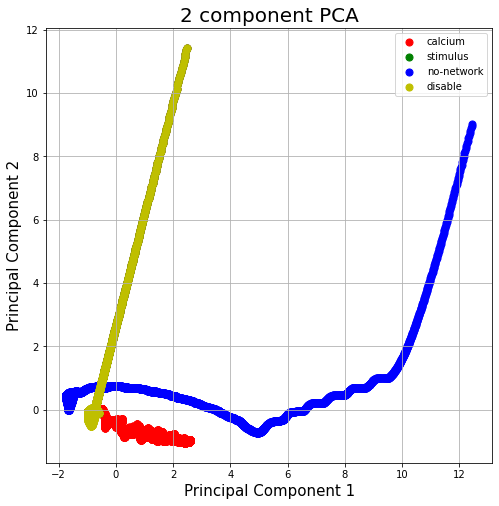

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['calcium', 'stimulus', 'no-network', 'disable']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['sim'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()